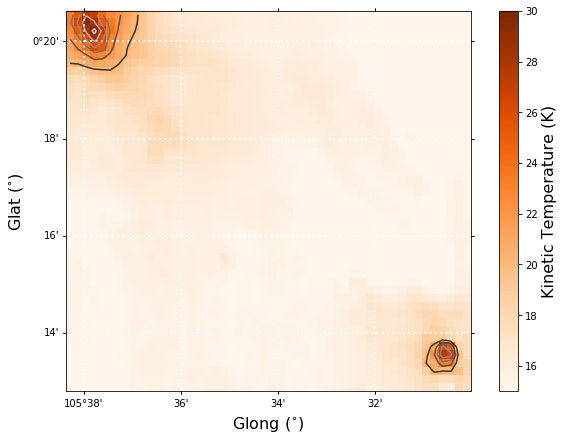

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table


filename = '/Users/jane/Desktop/s138_temp_regrid.fits'
outfile = '/Users/jane/Desktop/s138_temp_regrid.txt'

# load file, read data, wcs, and header
datfile = fits.open(filename)
#dat = datfile[0].data
wcs = WCS(datfile[0].header)

#  y = 1st position (starting at bottom), x = 2nd position (starting from left)
x = []
y = []
I = []
glat = []
glong = []

i = 0
j = 0

# scan through y-axis
for j in range(dat.shape[0]):
    # scan through x-axis 
    for i in range(dat.shape[1]):
        # set the value of the pixel
        zpix = dat[j,i]  # the flux value is found at pixel x, y 
        x.append(i)
        y.append(j)
        I.append(zpix)
        gx, gy = wcs.wcs_pix2world(i , j , 0) # convert the pixel numbers to WCS coordinates
        glong.append(gx)
        glat.append(gy)
        

# Set the header line, the parameters, and the format of the parameters to 
# write to an ascii table file        
out = Table()
out['Pix_x'] = x
out['Pix_y'] = y
out['GLat(deg)'] = glat
out['GLat(deg)'].info.format = '8.5f'
out['GLong(deg)'] = glong
out['GLong(deg)'].info.format = '8.5f'
out['T(K)'] = I
out['T(K)'].info.format = '6.2f'

# Write the values of all pixels to a text file 
ascii.write(out, outfile,  overwrite=True, format='tab')
  
fig = plt.figure(figsize=(10,7), facecolor='white')
ax = fig.add_subplot(111, projection=wcs[:, :]) # to get RA and DEC, add WCS projection from header
im = ax.imshow(datfile[0].data[:, :], cmap='Oranges') # plot data
ax.set_xlabel("Glong ($^{\circ}$)", fontsize=16)
ax.set_ylabel("Glat ($^{\circ}$)", fontsize=16)
cbar = plt.colorbar(im)
cbar.set_label('Kinetic Temperature (K)', size=16)
im.set_clim(15,30) # set colorbar limits
ax.grid(color='white', ls='dotted', lw=2) # add grid lines
levels = (20,22,24,26,28,30) # to overplot contours, set the levels of the contours first
ax.contour(datfile[0].data[:, :], cmap = 'binary_r', alpha=0.75, levels=levels) # to overplot contours

#plt.savefig("plot.pdf",format='pdf’)

In [4]:
print(datfile[0].data)

[[14.848875 14.784677 14.794663 ... 16.127983 17.896267 17.293205]
 [14.830924 14.835838 14.877315 ... 17.628761 18.37444  17.541271]
 [14.801394 14.846569 14.904594 ... 20.040209 19.574362 18.219078]
 ...
 [22.702219 24.966032 28.35279  ... 14.837971 14.97121  15.026616]
 [23.588356 26.437078 29.44108  ... 14.756133 14.862264 14.951095]
 [23.147694 25.429451 27.831041 ... 14.745834 14.832381 14.939382]]
